# Assignment 5: Neuroevolution

**Goal**: Implement an Evolutionary Algorithm to optimize an Artificial Neural Network (ANN) based controller for the CartPole task in OpenAI Gym environment.

CartPole evaluation environment functions are provided. Your goal is to implement your ANN to control the cartpole and use your Evolutionary Algorithm to optimize the ANN parameters (weights).

Please answer the `Questions` and implement coding `Tasks` by filling **PLEASE FILL IN** sections. *Documentation* of your code is also important. You can find the grading scheme in implementation cells.

  * Plagiarism is automatically checked and set to **0 points**

  * It is allowed to learn from external resources but copying is not allowed. If you use any external resource, please cite them in the comments (e.g. `# source: https://...../` (see `fitness_function`))

**Install Prerequisites**

In [1]:
# Run this cell to install the required libraries
%pip install numpy matplotlib scipy

Note: you may need to restart the kernel to use updated packages.


**Imports**

In [2]:
# Necessary libraries
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Enables inline matplotib graphs
%matplotlib inline
# Comment the line above and uncomment the lines below to have interactive plots
# WARN: may cause dependency issues
# %matplotlib qt5
# %pip install PyQt5
# plt.ion()

In [8]:
%pip install pygame
import pygame

  Obtaining dependency information for pygame from https://files.pythonhosted.org/packages/4d/84/5a03c47c76020c4f46354cf8c3f2d7926592c1ff9370f0ad91a3bb577b54/pygame-2.5.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 9.8 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install gymnasium
import gymnasium as gym

  Obtaining dependency information for gymnasium from https://files.pythonhosted.org/packages/a8/4d/3cbfd81ed84db450dbe73a89afcd8bc405273918415649ac6683356afe92/gymnasium-0.29.1-py3-none-any.whl.metadata
  Obtaining dependency information for farama-notifications>=0.0.1 from https://files.pythonhosted.org/packages/05/2c/ffc08c54c05cdce6fbed2aeebc46348dbe180c6d2c541c7af7ba0aa5f5f8/Farama_Notifications-0.0.4-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 11.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


---
**Question 1 (0-0.25-0.5 pt):** Following link provides more information about the CartPole environemnt we would like to find an ANN to control: https://www.gymlibrary.dev/environments/classic_control/cart_pole/

Please have a look at the link and note the observation and action spaces, how many dimensions they have? Are they continous or discrete, and what kinds of value they can get?

**Answer:** The action space is discrete, while the observation space is continuous. The observation space has 4 dimensions (position, velocity, angle and the pole's angular velocity), and action space has 1 (a binary variable which indicates whether the cart goes right (1) or left (0)). The range in which observation values can vary are:

- Cart position: between -4.8 and 4.8
- Cart velocity: between -Inf and Inf
- Pole angle: approximately between -0.418 radians (-24°) and 0.418 radians (24°)
- Pole angular velocity: between -Inf and Inf

---
**Question 2 (0-0.25-0.5 pt):** What is your proposed ANN architecture and why? Please also discuss the activation functions you choose.

**Answer:** My proposed ANN architecture is a Feedforward Neural Network, because of the low dimensionality and simplicity of the problem. Also, there are no spatial hierarchies, such as in images, which would require more complex architectures, such as a CNN.

The activation functions I chose are the Rectified Linear Unit, to introduce non-linearity with low computing cost, and a final Softmax activation function, to output 1 value between 0 and 1, so the model can decide the next action based on that value (> 0.5 right, else left)

---
**Task 1: Implementation of Evolutionary Algrotihm (0-1.6-3.8-4.2-5 pt):** Implement your evolutionary algorithm to find an ANN controller for the CartPole task.

In [15]:
#################################
# Grading
# 0 pts if the code does not work, code works but it is fundamentally incorrect
# 1.6 pts if the code works but some functions are incorrect and it is badly explained
# 3.8 pts if the code works but some functions are incorrect but it is explained well
# 4.2 pts if the code works very well aligned with the task without any mistakes, but it is badly explained
# 5 pts if the code works very well aligned with the task without any mistakes, and it is well explained
################################################################

# Artificial Neural Network parameters (weights)
# See here: https://www.gymlibrary.dev/environments/classic_control/cart_pole/ for input and output space
# PLEASE SPECIFY BELOW
inp = 4 # Number of input neurons
hid = 16 # Number of hidden neurons
out = 1 # Nubmer of output neurons
###################

#Open AI gym environment
env = gym.make("CartPole-v1")

# CartPole evaluation function with video recording
def cartpole_record_video(x):
    tmp_env = gym.make("CartPole-v1", render_mode="rgb_array")

    # Video recording function - be sure to check the folder path - you should see the video here:content/video/cartpole
    env = gym.wrappers.RecordVideo(env=tmp_env, video_folder="content/video/cartpole", name_prefix="cartpole")

    ###########
    # PLEASE FILL IN
    # Hint: x is an individual in evolutionary algorithms and needs to map to the connection weights of ANNs
    #########


    # Reset environment
    observation, info = env.reset(seed = 0)

    env.start_video_recorder()


    rew = 0 # Initial reward
    step = 0; #step counter
    done = False
    maxStep = 1000  # maximum number of steps
    while not done and step<1000: # run nStep number of time

        ###################
        # PLEASE FILL IN
        # Hint: Provide input to ANN and find the output to be the action
        #perform forward pass to get action values
        action_values = forward(x, observation)
        #select the index of the action with the highest value (0 or 1, as expected by the model)
        action = np.argmax(action_values)
        # action should be provided based on the output of the artifial neural network
        observation, reward, done, tr, info = env.step(action)
        step+=1 # step counter
        rew = rew + reward # after each step increment reward
        env.render()

    env.close_video_recorder()
    env.close()
    return np.minimum(maxStep, rew) # return the reward or maxStep (if maxStep < 1000, this means that pole fell)




# CartPole evaluation function for visualizing the cartpole environment
def cartpole_visualize(x):
    tmp_env = gym.make("CartPole-v1", render_mode="human")

    ###########
    # PLEASE FILL IN
    # Hint: x is an individual in evolutionary algorithms and needs to map to the connection weights of ANNs

    #########

    # Reset environment
    observation, info = tmp_env.reset(seed = 0)

    rew = 0 # Initial reward
    step = 0; #step counter
    done = False
    maxStep = 1000  # maximum number of steps
    while not done and step<1000: # run nStep number of time

        ###################
        # PLEASE FILL IN
        # Hint: Provide input to ANN and find the output to be the action
        action_value = forward(x, observation)
        #output is sigmoid. If value is > 0.5, go right, else go left
        if action_value > 0.5:
          action = 1
        else:
          action = 0
        # action = np.argmax(action_values)
        # action should be provided based on the output of the artifial neural network
        observation, reward, done, tr, info = tmp_env.step(action)
        step+=1 # step counter
        rew = rew + reward # after each step increment reward
        tmp_env.render()

    tmp_env.close()
    return np.minimum(maxStep, rew) # return the reward or maxStep (if maxStep < 1000, this means that pole fell)

# CartPole evaluation function
def cartpole(x):

    ###########
    # PLEASE FILL IN
    # Hint: x is an individual in evolutionary algorithms and needs to map to the connection weights of ANNs
    #########

    # Reset environment
    observation, info = env.reset(seed = 0)
    rew = 0 # Initial reward
    step = 0 #step counter
    done = False
    maxStep = 1000  # maximum number of steps
    while not done and step<1000:
        ###################
        # PLEASE FILL IN
        # Hint: Provide input to ANN and find the output to be the action
        #perform forward pass to get action values
        action_value = forward(x, observation)
        #output is sigmoid. If value is > 0.5, go right, else go left
        if action_value > 0.5:
          action = 1
        else:
          action = 0
        # action should be provided based on the output of the artifial neural network
        observation, reward, done, tr, info = env.step(action)
        step+=1 # step counter
        rew = rew + reward # after each step increment reward

    env.close()
    return np.minimum(maxStep, rew) # return the reward or maxStep (if maxStep < 1000, this means that pole fell)

def relu(x):
    return np.maximum(0,x)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def initialize_population(population_size):

    population = []

    for _ in range(population_size):
        #each individual in a population is a List object containing the weight matrices
        #weight matrices are matrices which store the weights of the connections
        #between neurons of sequential layers
        #SHAPE:
          #rows: number of post-synaptic neurons
          #columns: number of pre-synaptic neurons
        #NOTATION:
          #Whi: weights of input-hidden connections
          #Woh: weights of hidden-output connections

        whi = np.random.randn(hid,inp)
        woh = np.random.randn(out,hid)

        x = [whi.flatten(),woh.flatten()]

        population.append(x)

    return population

def forward(x,observation):
    #set the input layer to the current observation state
    ai = np.asarray(observation)

    #get the weights of the network, reshapes to do multiplications
    whi = x[0].reshape(hid,inp)
    woh = x[1].reshape(out,hid)

    #computes hidden layer activations

    ah = relu(np.dot(whi,ai))

    #computes output layer activations

    ao = sigmoid(np.dot(woh,ah))

    return ao


def evaluation(x,objective_function):
    """Evaluate the whole population and return the fitness of each."""
    return [objective_function(solution) for solution in x]

def parent_selection(x, f):
    """Select parents for the next generation"""

    ################################################################

    x_parents = []
    f_parents = []
    total_fitness = int(np.ceil(np.nansum(f)))
    selection_vector = []
    positions_occupied = 0

#      print(f"total fitness {total_fitness}")
    for ((i,individual),fitness) in zip(enumerate(x),f):
        try:
            positions_occupied = int(np.ceil(fitness))
        except Exception as e:
            pass

        for _ in range(positions_occupied):
            selection_vector.append(i)
#        print("idividual, positions_occupied", individual, positions_occupied)
#        print("filled selection_vector", selection_vector[last_position:last_position+positions_occupied])
#        print(last_position)


    for i in range(len(x)):
        random_selection_index = np.random.randint(low=0,high=len(selection_vector))
#        print(f"rand select index {random_selection_index}")
        parent_index = selection_vector[random_selection_index]
        x_parents.append(x[parent_index])
#        print(f"#{i} selected parent: {selection_vector[random_selection_index]}")
        f_parents.append(f[parent_index])
#        print(f"#{i} selected fitness: {fitness_selection_vector[random_selection_index]}")

        ####################################
    return x_parents, f_parents

def crossover(x_parents, p_crossover):
    """Perform crossover to create offsprings."""
    # performs
    ################################################################
    # PLEASE FILL IN
    # create a new empty array for the offspring
    offspring = []
    n_individuals = len(x_parents)

    whi_dimensions = x_parents[0][0].shape
    woh_dimensions = x_parents[0][1].shape
    for i in range(0,n_individuals,2):
        individual1 = [np.zeros(whi_dimensions),np.zeros(woh_dimensions)]
        individual2 = [np.zeros(whi_dimensions),np.zeros(woh_dimensions)]
        # flatten the weight matrices to perform easier crossover operations
        flattened_whi_p1 = x_parents[i][0].flatten()
        flattened_woh_p1 = x_parents[i][1].flatten()

        flattened_whi_p2 = x_parents[i+1][0].flatten()
        flattened_woh_p2 = x_parents[i+1][1].flatten()

        whi_point_of_crossover = np.random.randint(low=0,high=len(flattened_whi_p1))
        woh_point_of_crossover = np.random.randint(low=0,high=len(flattened_whi_p2))

        if np.random.random() < p_crossover: #simulates probability of crossover
            individual1[0] = np.concatenate((x_parents[i][0][:whi_point_of_crossover],x_parents[i+1][0][whi_point_of_crossover:]))
            individual1[1] = np.concatenate((x_parents[i][1][:woh_point_of_crossover],x_parents[i+1][1][woh_point_of_crossover:]))

            individual2[0] = np.concatenate((x_parents[i][0][whi_point_of_crossover:],x_parents[i+1][0][:whi_point_of_crossover]))
            individual2[1] = np.concatenate((x_parents[i][1][woh_point_of_crossover:],x_parents[i+1][1][:woh_point_of_crossover]))

            offspring.append(individual1)
            offspring.append(individual2)
        else: #if not selected for crossover, copy the previous generation
            individual1[0] = np.copy(x_parents[i][0])
            individual1[1] = np.copy(x_parents[i][1])

            individual2[0] = np.copy(x_parents[i+1][0])
            individual2[1] = np.copy(x_parents[i+1][1])

            offspring.append(individual1)
            offspring.append(individual2)

        ################################################################


    return offspring


def mutation(x, mutation_rate):
    """Apply mutation to an individual."""
    ################################################################
    # PLEASE FILL IN
    #gets the weigh matrices size to sample random index in the ranx
    whi_size = x[0][0].shape[0]
    woh_size = x[0][1].shape[0]
    for individual in x:
        #to simulate probability of mutation
        if np.random.random() < mutation_rate:
              #calculate standard deviation to be used in the mutation equation
            whi_std_dev = np.nanstd(individual[0])
            woh_std_dev = np.nanstd(individual[1])
            #randomly pick an index and a mutation
            whi_mutation_index = np.random.randint(low=0,high=whi_size)
            woh_mutation_index = np.random.randint(low=0,high=woh_size)

              #mutates
            individual[0][whi_mutation_index] = individual[0][whi_mutation_index] + whi_std_dev * np.random.randn()
            individual[1][woh_mutation_index] = individual[1][woh_mutation_index] + woh_std_dev * np.random.randn()
  ################################################################
    return x


def survivor_selection(x, f, x_offspring, f_offspring):
    """Select the survivors, for the population of the next generation"""

    ################################################################

    top_performing_indices = []

    population = x + x_offspring
    population_fitness = np.concatenate((f,f_offspring))

    fitness_copy = np.copy(population_fitness)

    survivors = []
    survivor_fitness = []

    #get the top performing individuals from the previous generations
    for _ in range(len(x)):
        max_index = np.argmax(fitness_copy)
        top_performing_indices.append(max_index)
        fitness_copy[max_index] = 0



    for i,index in enumerate(top_performing_indices):
        survivors.append(population[index])
        survivor_fitness.append(population_fitness[index])

    x = survivors
    f = np.asarray(survivor_fitness)

    ################################################################

    return x, f



# Implement your Evolutionary Algorithm to find the ANN weigths that can balance the CartPole
# Feel free to add any functions, such as initialization, crossover, etc.. to make it work!
def ea(
    # hyperparameters of the algorithm
    population_size,
    max_fit_evals,  # Maximum number of evaluations
    p_crossover,  # Probability of performing crossover operator
    m_rate,  # mutation rate
    objective_function,  # objective function to be minimized
):
    ###################
    # PLEASE FILL IN
    # Hint: your implementation of your evolutionary algorithm
    # You may use the code you previously implemented during the course


    # Calculate the maximum number of generations
    # Maximum number of function evaluations should be the same independent of the population size
    max_generations = int(max_fit_evals / population_size)  # DO NOT CHANGE

    x = initialize_population(population_size=population_size)
    f = evaluation(x,objective_function)

    ################################################################

    # Find the best individual and append to a list to keep track in each generation
    idx = np.argmax(f)
    x_best = [x[idx]]
    f_best = [f[idx]]

    # Loop over the generations
    for i in range(max_generations - 1):
        # Perform the EA steps

        ################################################################

        # PLEASE FILL IN

        #select parents for the next generation

        parents,parents_fitness = parent_selection(x,f)

        #generate offspring from crossover of parents

        offspring = crossover(parents,p_crossover)

        #mutate offspring
        mutated_offspring = mutation(offspring,m_rate)

        #get the offspring fitness to be passed to survival_selection
        offspring_fitness = evaluation(mutated_offspring,objective_function)

        x,f = survivor_selection(parents,f,offspring,offspring_fitness)

        ################################################################

        # Find the best individual in current generation and add to the list

        idx = np.argmax(f)
        xi_best = x[idx]
        fi_best = f[idx]


        if fi_best > f_best[-1]:
            x_best.append(xi_best)
            f_best.append(fi_best)
        else:
            x_best.append(x_best[-1])
            f_best.append(f_best[-1])

#         print(f"GENERATION: {i}")
#         print(f"MAX FIT: {f_best[-1]}")


    return x_best, f_best  # return the best solution (ANN weights) and the fitness in each generation

#### Check Your Implementation: Running The Evolutionary Algorithm

Run the cell below, if you implemented everything correctly, you should see the algorithm running. Furthermore,

In [41]:
# Dummy parameters, please add or remove based on your implementation
kwargs = {
    "population_size": 1000,
    "max_fit_evals": 1000,  # maximum number of fitness evaluations
    "p_crossover": 0.9,  # crossover probability
    "m_rate": 0.9,  # mutation rate
    "objective_function": cartpole,
}
# Run your algorithm once and find the best ANN weigths found
env = gym.make("CartPole-v1")

observation, info = env.reset(seed = 0)
x_best, f_best = ea(**kwargs)

# Print the best ANN weigths found and best fitness
print("Best ANN parameters found:",x_best[-1])
print("Best fitnes found:",f_best[-1])

# Evaluate your ANN weights again and record the video
if f_best[-1] >= 1000:
#   cartpole_record_video(x_best[-1])
  cartpole_visualize(x_best[-1])
else:
  print("The best fitness 1000 was not found, try again!!")

Best ANN parameters found: [array([-0.57615891,  0.94807077, -0.49591409,  2.00737083, -0.81709426,
        0.55350281,  0.27319428,  0.00804584,  2.65504468, -1.29596026,
        0.55505501,  1.66407607,  1.02225236,  1.30019532,  0.21944314,
        1.22831356,  1.06812075,  0.28500125, -1.72270527,  1.30726794,
       -0.18737677, -0.97598164,  0.68128672, -0.14625306, -0.8716835 ,
        0.52319211,  1.80223478,  0.22499432, -0.7393161 ,  0.52978904,
        0.35482674,  0.88157424,  0.16370838,  0.21557218, -0.9851135 ,
        0.13877976,  0.45178999, -0.17627559,  1.56497207, -1.02539307,
       -0.29174935,  0.73569026,  0.14506528,  0.5363008 ,  1.23742389,
        0.26514073, -1.24337636,  0.76275739,  1.74329504,  0.02847262,
       -0.65664452, -1.77575838, -0.19277662,  0.02913667,  0.28161195,
       -1.54978435,  0.59288271, -0.05497095, -1.90330249, -0.7080925 ,
       -0.57730705,  0.22188582, -0.16109485, -1.38330955]), array([ 0.58378485,  0.59053011,  0.21769609,  

---
**Question 3 (0-0.25-0.5 pt):** Please comment on the behavior of the final solution. Were you able to find the best solution (i.e. ANN weights which achieves best fitness: 1000) and was it possible to controll the CartPole task without letting the the pole fall?

**Answer:** I was able to find the best solution, and it was also possible to control the CartPole withot letting the pole fall. It took some adjustments to achieve with more frequency the best result, like increasing the mutation rate to 0.9. Apart from that, everything went smoothly.

**Average results of your algorithm**

Remember that the EAs are sthocastic algorithms that can produce different results as a result of independent runs.

Therefore, we would like to see the average results and standard deviations.


---
**Task 2 (0-1.5-3 pt):** Please run your algorithm for at least 10 times and plot the average results and standard deviations. Below, you may add as many cells as you need for this implementation and plot functions. You may use previous code you have developed/used during the course.

In [19]:
def calculate_mean_std(f_best):
    """This is a helper function to calculate the mean and standard deviation of the best fitness values."""
    f_best = np.array(f_best)
    avg = np.mean(f_best, axis=0)
    std = np.std(f_best, axis=0)
    return avg, std

In [ ]:
def generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2,
    stds_experiment_2,
):
    """This helper function generates subplots for the experiments."""
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))

    for i in range(len(avgs_experiment_1)):
        if avgs_experiment_2 is not None:
            # Plot data for subplot 1
            axes[i].plot(avgs_experiment_2[i], label="Experiment 2", color="green")
            axes[i].fill_between(
                np.arange(len(avgs_experiment_2[i])),
                avgs_experiment_2[i] - stds_experiment_2[i],
                avgs_experiment_2[i] + stds_experiment_2[i],
                alpha=0.2,
                color="green",
            )
            axes[i].set_ylim(bottom=0)

        axes.plot(avgs_experiment_1[i], label="Experiment 1", color="blue")
        axes.fill_between(
            np.arange(len(avgs_experiment_1[i])),
            avgs_experiment_1[i] - stds_experiment_1[i],
            avgs_experiment_1[i] + stds_experiment_1[i],
            alpha=0.2,
            color="blue",
        )
        axes.set_title(labels[i])
        axes.set_ylim(bottom=0)


    # Set common labels and title
#     for ax in axes:
    axes.set_xlabel("Generations")
    axes.set_ylabel("Average Best Fitness")
    axes.legend()

    plt.tight_layout()

In [54]:
def run_experiment(population_size, p_crossover, m_rate):
    runs = 10  # number of runs
    max_fit_evals = 1000  # max fitness evaluations

    exp = []

    for _ in range(runs):
        _, f_best_exp = ea(
            population_size[0],
            max_fit_evals,
            p_crossover[0],
            m_rate[0],
            cartpole,
        )
        exp.append(f_best_exp)

    # find average and std of the runs
    exp_avg, exp_std = calculate_mean_std(exp)
    
    avgs = [exp_avg]

    stds = [exp_std]

    all_runs = [
        exp,
    ]

    return avgs, stds, all_runs

In [49]:
population_size = [10]  # DO NOT CHANGE
p_crossover = [0.8]  # DO NOT CHANGE
m_rate = [0.9]  # DO NOT CHANGE

avgs_experiment_1, stds_experiment_1, all_runs_experiment_1 = run_experiment(
    population_size, p_crossover, m_rate
)

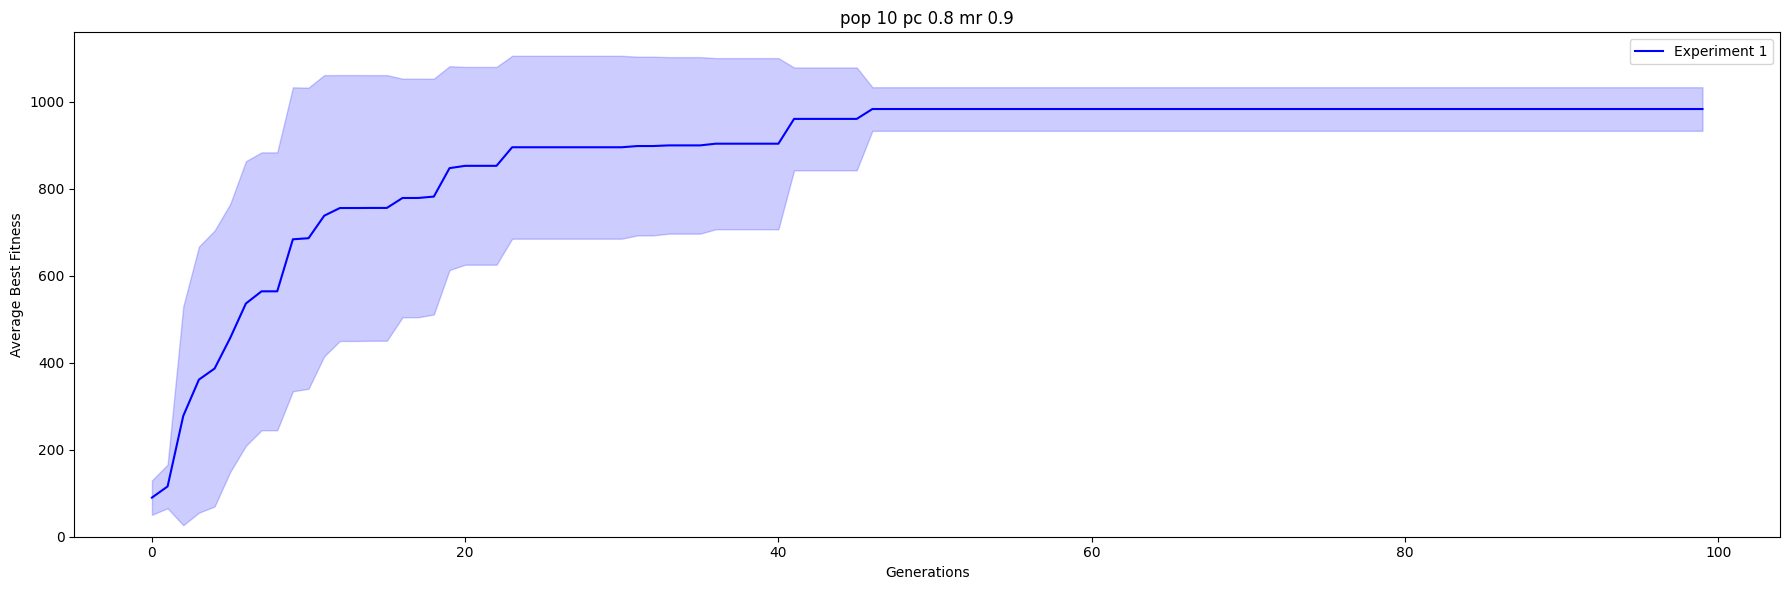

In [56]:
labels = ["pop 10 pc 0.8 mr 0.9"]

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=None,
    stds_experiment_2=None,
)

---
**Question 4 (0-0.25-0.5 pt):** Please comment on the average behavior of your algorithm. How did the average results and standard deviations look? Did your algorithm converge all the time to the best fitness?

**Answer:** The average results had a steep increase in the initial 20 generations, and smoothed after that, converging to the best fitness (1000) after approximately the 45th generation. The standard deviation was large in the beggining, but kept getting smaller and in the end converged to a constant value, like the average. My algorithm did not converge all the time to the best fitness, as it is shown in the plotted standard deviation after the 45th generation.